<IPython.core.display.Javascript object>


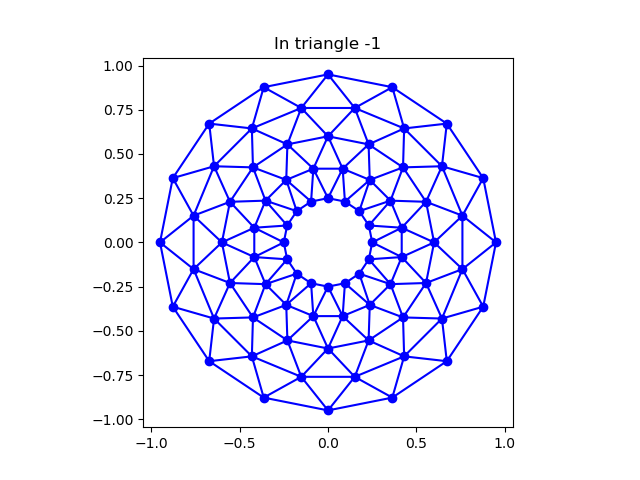

In [1]:
%matplotlib notebook

"""
Example showing the use of a TriFinder object.  As the mouse is moved over the
triangulation, the triangle under the cursor is highlighted and the index of
the triangle is displayed in the plot title.
"""
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
from matplotlib.patches import Polygon
import numpy as np
import math


def update_polygon(tri):
    if tri == -1:
        points = [0, 0, 0]
    else:
        points = triangulation.triangles[tri]
    xs = triangulation.x[points]
    ys = triangulation.y[points]
    polygon.set_xy(list(zip(xs, ys)))


def motion_notify(event):
    if event.inaxes is None:
        tri = -1
    else:
        tri = trifinder(event.xdata, event.ydata)
    update_polygon(tri)
    plt.title('In triangle %i' % tri)
    event.canvas.draw()


# Create a Triangulation.
n_angles = 16
n_radii = 5
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)
angles = np.linspace(0, 2*math.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += math.pi / n_angles
x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
triangulation = Triangulation(x, y)
xmid = x[triangulation.triangles].mean(axis=1)
ymid = y[triangulation.triangles].mean(axis=1)
mask = np.where(xmid*xmid + ymid*ymid < min_radius*min_radius, 1, 0)
triangulation.set_mask(mask)

# Use the triangulation's default TriFinder object.
trifinder = triangulation.get_trifinder()

# Setup plot and callbacks.
plt.subplot(111, aspect='equal')
plt.triplot(triangulation, 'bo-')
polygon = Polygon([[0, 0], [0, 0]], facecolor='y')  # dummy data for xs,ys
update_polygon(-1)
plt.gca().add_patch(polygon)
plt.gcf().canvas.mpl_connect('motion_notify_event', motion_notify)
plt.show()